<a href="https://colab.research.google.com/github/venukashoju/ML/blob/main/Prediction_of_Wine_type_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [3]:
# white.head()
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
572,10.2,0.24,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.4,5
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
976,7.2,0.41,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1005,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
827,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5


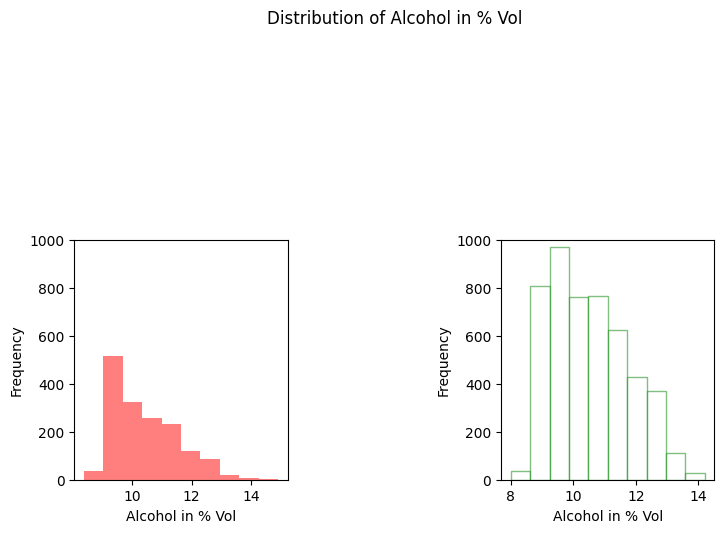

In [6]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
			alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
		ec ="green", lw = 1, alpha = 0.5,
		label ="White ")

fig.subplots_adjust(left = 0, right = 1, bottom = 0,
			top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()


In [7]:
red['type'] = 1
white['type'] = 0
wines = pd.concat([red,white],ignore_index=True)
from sklearn.model_selection import train_test_split
X = wines
X=X.drop('type',axis=1)
y = np.ravel(wines.type)
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.33, random_state = 20)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation ='relu', input_shape =(12, )))
model.add(Dense(9, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.output_shape
model.summary()
model.get_config()
model.get_weights()
model.compile(loss ='binary_crossentropy',
optimizer ='adam', metrics =['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Training Model
model.fit(X_train, y_train, epochs = 50,
		batch_size = 5, verbose = 2)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)


Epoch 1/50
871/871 - 1s - 1ms/step - accuracy: 0.9733 - loss: 0.0824
Epoch 2/50
871/871 - 1s - 1ms/step - accuracy: 0.9747 - loss: 0.0755
Epoch 3/50
871/871 - 1s - 1ms/step - accuracy: 0.9761 - loss: 0.0743
Epoch 4/50
871/871 - 2s - 2ms/step - accuracy: 0.9752 - loss: 0.0767
Epoch 5/50
871/871 - 3s - 4ms/step - accuracy: 0.9761 - loss: 0.0789
Epoch 6/50
871/871 - 1s - 2ms/step - accuracy: 0.9763 - loss: 0.0754
Epoch 7/50
871/871 - 1s - 1ms/step - accuracy: 0.9759 - loss: 0.0764
Epoch 8/50
871/871 - 1s - 1ms/step - accuracy: 0.9750 - loss: 0.0742
Epoch 9/50
871/871 - 1s - 1ms/step - accuracy: 0.9786 - loss: 0.0718
Epoch 10/50
871/871 - 1s - 1ms/step - accuracy: 0.9786 - loss: 0.0725
Epoch 11/50
871/871 - 1s - 1ms/step - accuracy: 0.9784 - loss: 0.0724
Epoch 12/50
871/871 - 2s - 2ms/step - accuracy: 0.9768 - loss: 0.0702
Epoch 13/50
871/871 - 2s - 2ms/step - accuracy: 0.9784 - loss: 0.0713
Epoch 14/50
871/871 - 2s - 2ms/step - accuracy: 0.9761 - loss: 0.0732
Epoch 15/50
871/871 - 1s - 1m